<a href="https://colab.research.google.com/github/bsmiranda/Data_science/blob/master/1_Analyzing_Movie_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyzing the notes in general**

In [ ]:
# importing the pandas library, reading the file in csv format
# returning the first five standard lines of a frame or data series
import pandas as pd

notes = pd.read_csv("ratings.csv")
notes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notes.shape

(100836, 4)

In [ ]:
# renaming the "ratings" column to "note"
notes.columns = ["userId", "movieId", "note", "timestamp"]
notes.head()

,userId,movieId,note,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
# returning unique values ​​for the grades that have been assigned
notes.note.unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [ ]:
notes.note.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: note, dtype: int64

In [ ]:
print("Mean:",notes.note.mean())
print("Median",notes.note.median())

Mean: 3.501556983616962
Median 3.5


In [ ]:
notes.note.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: note, dtype: float64

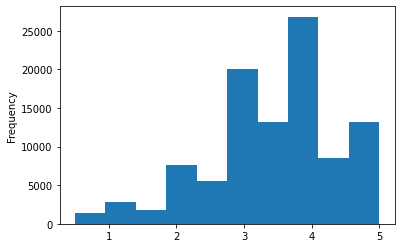

In [ ]:
# histogram to check the distribution of notes
notes.note.plot(kind="hist")

In [ ]:
notes.note.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: note, dtype: float64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


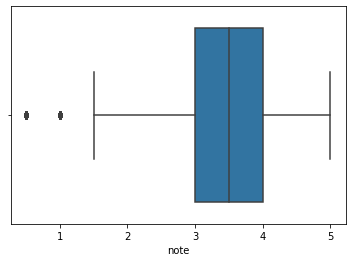

In [ ]:
import seaborn as sns

sns.boxplot(notes.note)

## **Analyzing specific notes of some films**

In [ ]:
# loading the movies.csv file
films = pd.read_csv("movies.csv")
films.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
notes.head()

,userId,movieId,note,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# **Analyzing some specific notes**

In [ ]:
notes.query("movieId==1").note.mean()

3.9209302325581397

In [ ]:
notes.query("movieId==2").note.mean()

3.4318181818181817

In [ ]:
notes.groupby("movieId")

In [ ]:
# analyzing the averages per film after the grouped data
average_per_film = notes.groupby("movieId").mean().note
average_per_film.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: note, dtype: float64

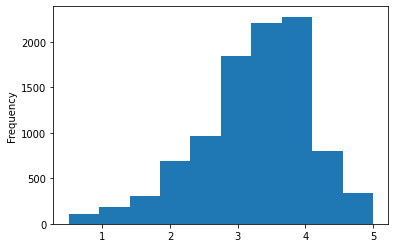

In [ ]:
average_per_film.plot(kind="hist")

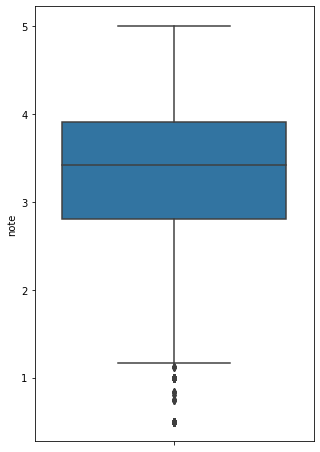

In [ ]:
# importing to the matplotlib library
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))
sns.boxplot(y=average_per_film)

In [ ]:
average_per_film.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: note, dtype: float64

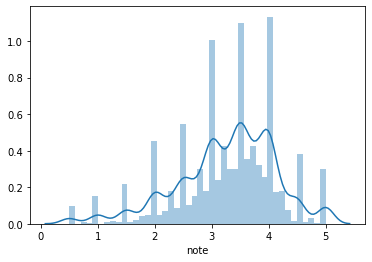

In [ ]:
# plotting average notes per film
sns.distplot(average_per_film)

Text(0.5, 1.0, 'Histogram of film averages')

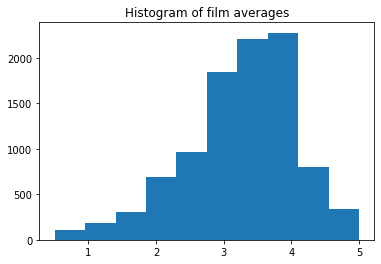

In [ ]:
# finally, we can generate a histogram showing the average grades of the films, giving a more adequate title to the histogram
plt.hist(average_per_film)
plt.title("Histogram of film averages")



# **Analyzing themoviedb data**

In [ ]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [ ]:
tmdb["original_language"].value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
fa       4
nl       4
th       3
he       3
id       2
ar       2
cs       2
ta       2
ro       2
te       1
pl       1
no       1
is       1
sl       1
ps       1
af       1
nb       1
el       1
tr       1
xx       1
ky       1
vi       1
hu       1
Name: original_language, dtype: int64

In [ ]:
tmdb["original_language"].value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'fa', 'nl', 'th', 'he', 'id', 'ar', 'cs', 'ta', 'ro', 'te',
       'pl', 'no', 'is', 'sl', 'ps', 'af', 'nb', 'el', 'tr', 'xx', 'ky', 'vi',
       'hu'],
      dtype='object')

In [ ]:
tmdb["original_language"].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [ ]:
# transforming into a dataframe
tmdb["original_language"].value_counts().to_frame()

,original_language
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12
ru,11


In [ ]:
# transforming the index into a column
language_count = tmdb["original_language"].value_counts().to_frame().reset_index()
language_count.columns = ["original_languege", "total"]
language_count.head()

,original_languege,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


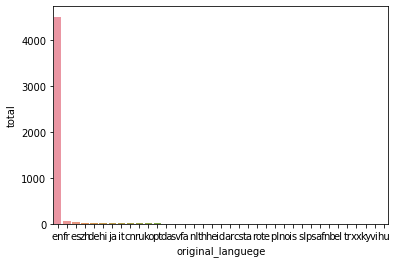

In [ ]:
# viewing these categories. -> Use the category plots (seaborn categorical)
sns.barplot(x = "original_languege", y = "total", data = language_count)

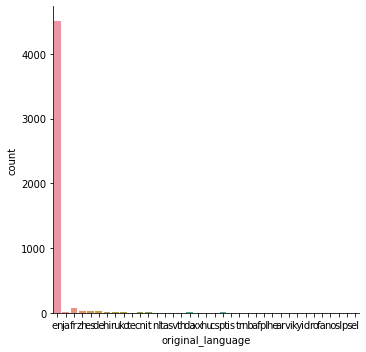

In [ ]:
# seaborn catplot -> Another way of doing it
sns.catplot(x = "original_language", kind="count", data = tmdb)

In [ ]:
total_by_language = tmdb["original_language"].value_counts()
grand_total = total_by_language.sum()
english_total = total_by_language.loc["en"]
total_rest = grand_total - english_total
print(english_total, total_rest)

4505 298


In [ ]:
# taking these values ​​and making a data frame
dates = {
    'language': ['english', 'others'],
    'total': [english_total, total_rest]
}
dates = pd.DataFrame(dates)
dates

,language,total
0,english,4505
1,others,298


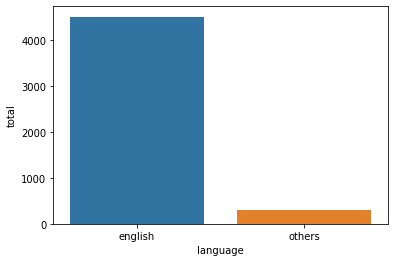

In [ ]:
# Plotting the data, we can see that English is predominant among other languages.
sns.barplot(x="language", y="total", data = dates)

([<matplotlib.patches.Wedge at 0x7f18b0d2b0f0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'english'),
  Text(1.0791697511565306, -0.2130555049482467, 'others')])

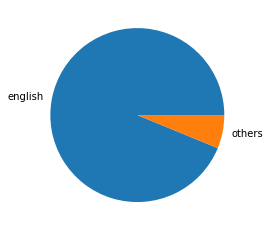

In [ ]:
# do not use this type of presentation to show the data
plt.pie(dates["total"], labels = dates["language"])

In [ ]:
# Checking films with languages ​​other than the original language
total_languages_other_films = tmdb.query("original_language != 'en'").original_language.value_counts()
total_languages_other_films

fr    70
es    32
de    27
zh    27
hi    19
ja    16
it    14
cn    12
ru    11
ko    11
pt     9
da     7
sv     5
nl     4
fa     4
he     3
th     3
ar     2
ta     2
ro     2
cs     2
id     2
ps     1
xx     1
af     1
hu     1
el     1
te     1
nb     1
pl     1
no     1
ky     1
vi     1
sl     1
is     1
tr     1
Name: original_language, dtype: int64

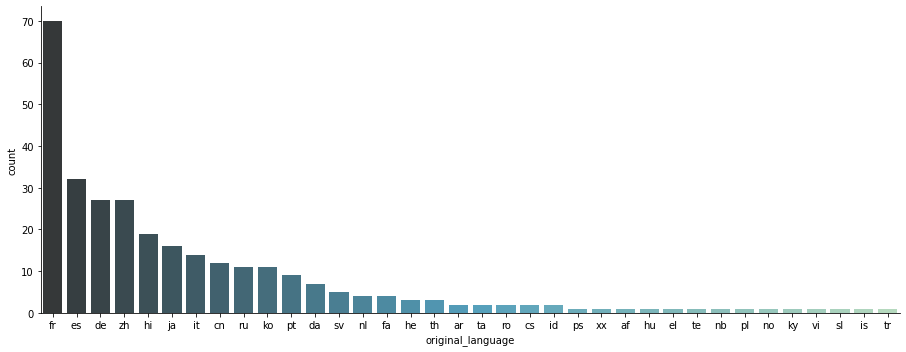

In [ ]:
# note: consult catplot documentation!
movies_without_an_original_english_language = tmdb.query("original_language != 'en'")

sns.catplot(x = "original_language", kind="count",
            data = movies_without_an_original_english_language,
            palette = "GnBu_d",
            aspect = 2.5, order = total_languages_other_films.index)

# **Reviewing the role of the mean, median, measures of central tendency, dispersion, standard deviation, boxplot, histogram**

In [ ]:
films.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
toy_story_notes = notes.query("movieId==1")
jumandji_notes = notes.query("movieId==2")
print(len(toy_story_notes), len(jumandji_notes))

215 110


In [ ]:
print("Mean Toy Story notes %.2f"% toy_story_notes.note.mean())
print("Mean Jumanji notes %.2f"% jumandji_notes.note.mean())

Mean Toy Story notes 3.92
Mean Jumanji notes 3.43


In [ ]:
print("Median Toy Story notes %.2f"% toy_story_notes.note.median())
print("Median Jumanji notes %.2f"% jumandji_notes.note.median())

Median Toy Story notes 4.00
Median Jumanji notes 3.50


In [ ]:
import numpy as np

film1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
film2 = np.append(np.array([5] * 10), np.array([1] * 10))

In [ ]:
print(film1.mean(), film2.mean())
print(np.std(film1), np.std(film2))
print(np.median(film1), np.median(film2))

3.0 3.0
0.5 2.0
3.0 3.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

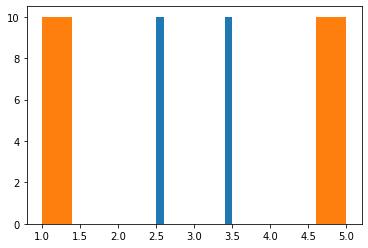

In [ ]:
plt.hist(film1)
plt.hist(film2)

{'boxes': [<matplotlib.lines.Line2D at 0x7f18b0b9b7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f18b0b27240>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f18b0b27cc0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f18b0b27940>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f18b0b9bb00>,
  <matplotlib.lines.Line2D at 0x7f18b0b30780>]}

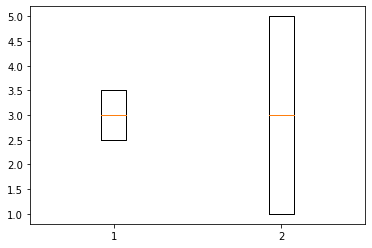

In [ ]:
plt.boxplot([film1, film2])

{'boxes': [<matplotlib.lines.Line2D at 0x7f18b0b11be0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f18b0b205f8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f18b0aaa0b8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f18b0b20cf8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f18b0b11eb8>,
  <matplotlib.lines.Line2D at 0x7f18b0aaaac8>]}

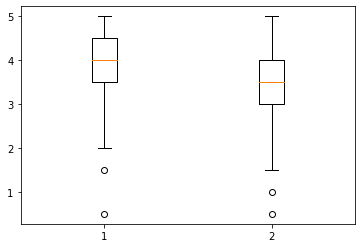

In [ ]:
plt.boxplot([toy_story_notes.note, jumandji_notes.note])

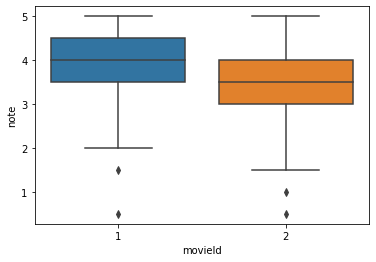

In [ ]:
sns.boxplot(x = "movieId", y = "note", data = notes.query("movieId in [1,2]"))

In [ ]:
print(toy_story_notes.note.std(), jumandji_notes.note.std())

0.8348591407114045 0.8817134921476455
